# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Monday, November 29, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*your explanation here*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
    * Exercise 3 in particular will take time to finish, plan accordingly, that is, make sure you have time to run your notebook from top to bottom.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.

## Solution guidelines
* Data processing is via Spark for the first three exercises and pandas/SQL in the fourth exercise.
* Where naming of dataframes and functions are explicitly stated, these must be used.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
    * You have to write clean, readable and efficient Spark code that will generate sensible execution plans.
    * You have to write clean, readable and efficient SQL queries.
    * Your tables and visualisations should be meaningful and easy to read. This requires, but is not limited to, including headers, legends and well-written (brief) descriptions for graphs/charts. In this step you've found the data processing solution, so put also some effort into its presentation.

## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 150.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 65 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$
  
  
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | John      |
| **Part 4** | Ann       |  Ann          |     John, Mary       | John       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |


* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4 which are all wrong. Then Ann's score is calculated as follows:

  * $\text{individual-score}(Ann) = \frac{5+5+10+5+5+15+15}{5+5+10+5+5+15+15+15+5} = \frac{60}{80} = 0.75$

  * $\text{group-score} = \frac{95}{150} = 0.633$

  * $\text{score}(Ann) = 7.5\cdot 0.75 + 2.5 \cdot 0.633 = 7.21$


# Group contribution table 

This table must be filled before submission.



In [1]:
import pandas as pd

d = {'Exercise 1' : ['', '', '', '', 'n.a'], 
     'Exercise 2' : ['', '', '', '', ''],
     'Exercise 3' : ['', '', '', '', 'n.a'],
     'Exercise 4' : ['', '', '', '', 'n.a'],
     } 
  
ct = pd.DataFrame(d, index=['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,n.a,,n.a,n.a


# The AirBnB dataset

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="400"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In the first three exercises you will use Spark to analyze data obtained from the Airbnb website (stricly speaking via data scraped by [insideairbnb](http://insideairbnb.com/get-the-data.html)). The purpose of your analysis is to extract insights about listings as a whole, specifics about London, and sentiment analysis of reviews (word positivity).


## Loading data
The dataset consists of listings (offered lodgings) and reviews (submitted by users). The `.csv`'s you'll work with vary between the first three exercises, but is structured so that the function below will load it into a spark dataframe.

In [2]:
def load_csv_as_dataframe(path):
    return spark.read.option('header', True) \
                .option('inferSchema', True) \
                .option('multiLine', 'True') \
                .option('escape', '"') \
                .option('mode', 'DROPMALFORMED')\
                .csv(path)

## Imports and Spark session

* You'll need to adapt the `JAVA_HOME` environment variable to your setup. 
* You should set the `spark.driver.memory` value to the amount of memory on your machine. 
* It may be required for you to install some of the packages imported below (e.g. pandasql).

In [3]:
# Instructions on p. 20 Learning Spark, 2nd ed.
# Here's a quick-guide, googling may also be required
# 1) Install pyspark via conda/pip
#          pyspark requires the JAVA_HOME environment variable is set.
# 2) Install JDK 8 or 11, figure out the install location
#          Suggest to use https://adoptopenjdk.net/
# 3) Update the JAVA_HOME environment variable set programmatically below 
#    with your install location specifics

# JAVA_HOME environment variable is set programatically below
# but you must point it to your local install

import os
os.environ['JAVA_HOME'] = 'C:\Program Files\Eclipse Adoptium\jdk-8.0.312.7-hotspot'

# If you get "Job aborted due to stage failure" and 
# "Python worker failed to connect back." exceptions, 
# this should be solved by additionally setting these 
# environment variables

os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf
from pyspark.sql.window import Window

from pandas_profiling import ProfileReport

import pandasql as psql

In [5]:
%matplotlib inline 
# needs to run twice

In [6]:
# Sets memory limit on driver and to use all CPU cores
conf = SparkConf().set('spark.ui.port', '4050') \
        .set('spark.driver.memory', '8g') \
        .setMaster('local[*]')

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [7]:
spark

In [8]:
sc.getConf().getAll()

[('spark.driver.port', '57099'),
 ('spark.executor.id', 'driver'),
 ('spark.app.id', 'local-1638207874327'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.ui.port', '4050'),
 ('spark.driver.host', '192.168.0.17'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.memory', '8g'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.startTime', '1638207872089'),
 ('spark.sql.warehouse.dir',
  'file:/C:/Users/lfirl/Documents/DTU/Computational%20Tools%20for%20Data%20Science/project%202/spark-warehouse'),
 ('spark.ui.showConsoleProgress', 'true')]

# Exercise 1: Listings and cities (20 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized).


## Part 1: Preparing the dataframe (5 pts)

Your data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/listings.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_listings`.

After the data is read, you should select the columns necessary for exercise 1, 2 and 3 (by reading ahead or iteratively extend this loading code). Name this dataframe `df_listings_analysis` and make use of caching.

Prices are in local currency, but are nonetheless prefixed with `$` and contains thousands separator commas. You will need to remove these characters and cast the price column to `pyspark.sql.types.DoubleType`. Observe that if this casting is not possible, the result of the cast is `null`.

In [9]:
df_listings = load_csv_as_dataframe('listings.csv')

In [10]:
from pyspark.sql.types import DoubleType

prices_string="price"

df_listings_analysis=df_listings.withColumn(prices_string,F.regexp_replace(prices_string,"\$",""))

df_listings_analysis=df_listings_analysis.withColumn(prices_string,F.regexp_replace(prices_string,",",""))

In [11]:
df_listings_analysis=df_listings_analysis.withColumn(prices_string,df_listings_analysis[prices_string].cast(DoubleType()))

In [12]:
# Your code goes here
df_listings_analysis = df_listings_analysis.select('id', 'neighbourhood_cleansed', 'city', 'price', 'review_scores_rating', 'property_type')
df_listings_analysis.show(5)


+------+----------------------+---------+------+--------------------+-------------+
|    id|neighbourhood_cleansed|     city| price|review_scores_rating|property_type|
+------+----------------------+---------+------+--------------------+-------------+
|145320|            Södermalms|Stockholm|1272.0|                  97|    Apartment|
|155220|            Skarpnäcks|Stockholm|1203.0|                null|        House|
|155685|            Södermalms|Stockholm|3209.0|                  94|    Apartment|
|164448|            Södermalms|Stockholm| 597.0|                  97|    Apartment|
|170651|            Södermalms|Stockholm| 734.0|                  93|    Apartment|
+------+----------------------+---------+------+--------------------+-------------+
only showing top 5 rows



In [13]:
df_listings_analysis.cache()

DataFrame[id: string, neighbourhood_cleansed: string, city: string, price: double, review_scores_rating: string, property_type: string]

## Part 2: Listing and neighbourhood counts (5 pts)

Compute and visualise the number of listings and the number of different neighbourhoods per city, restricted to the 15 cities having the most listings. The x-axis should be ordered by number of listings (high to low).

Make sure to use the `neighbourhood_cleansed` column in your computations.


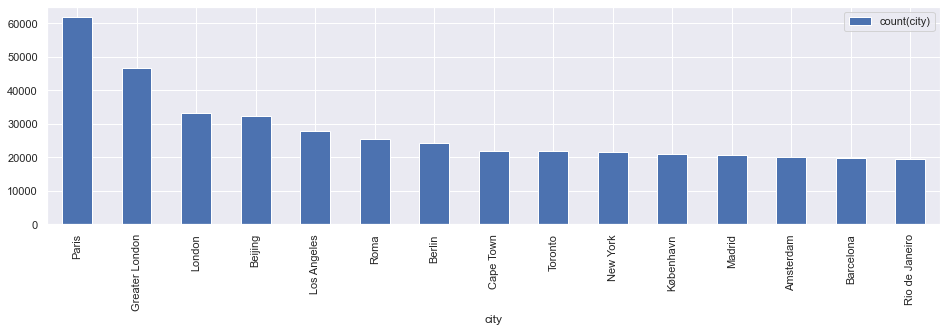

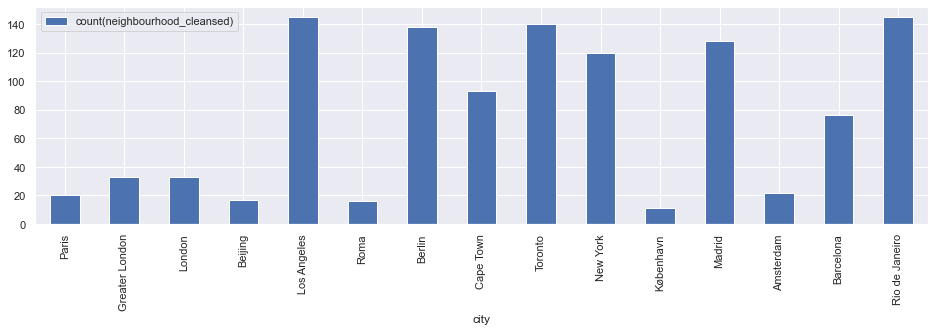

In [14]:
# your code goes here
df_city_count = df_listings_analysis.groupBy('city').agg(F.countDistinct("neighbourhood_cleansed"), F.count('city')) \
       .sort(F.desc(F.count('city'))) \
       .limit(15).toPandas()
a_ = df_city_count.drop(columns = ["count(neighbourhood_cleansed)"]).set_index('city').plot.bar(figsize=(16, 4))
b_ = df_city_count.drop(columns = ["count(city)"]).set_index('city').plot.bar(figsize=(16, 4))

## Part 3: Price averages (5 pts)

Compute and visualise the average price of listings per city, restricted to the 15 cities having the most listings.

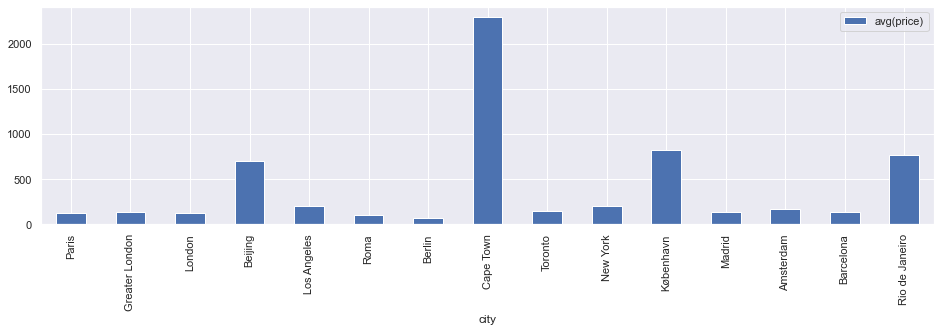

In [15]:
# your code goes here
df_price_list = df_listings_analysis.groupBy('city').agg(F.mean("price"), F.count('city')) \
       .sort(F.desc(F.count('city'))) \
       .limit(15).toPandas()
_ = df_price_list.drop(columns = ["count(city)"]).set_index('city').plot.bar(figsize=(16, 4))

## Part 4: Value for money (5 pts)

The value of a listing is its rating divided by its price. The value of a city is the average value of its listings. 

Prices are only comparable when the local currency is the same. We'll therefore consider a subset of Euro-zone cities as defined in `eurozone_cities`.

Compute and visualise the value per city, restricted to the Euro-zone cities.

In [16]:
eurozone_cities = [
    'Paris', 'Roma', 'Berlin', 'Madrid', 'Amsterdam', 'Barcelona', 'Milano', 'Lisboa',
    'München', 'Wien', 'Lyon', 'Firenze', 'Porto', 'Napoli', 'Bordeaux', 'Venezia',
    'Málaga', 'Sevilla', 'València'
]

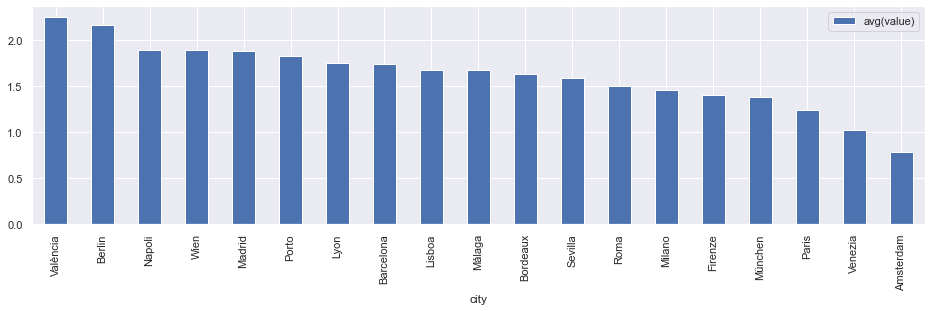

In [17]:
# your code goes here
cond=F.col('city').isin(eurozone_cities) & (~ (F.col('review_scores_rating') == "None"))

df_temp=df_listings_analysis.filter(cond)
df_temp.withColumn("review_scores_rating",df_temp["review_scores_rating"].cast(DoubleType()))
df_temp=df_temp.select("city","price","review_scores_rating",(F.col("review_scores_rating")/F.col("price")).alias("value"))


df_temp.groupby("city").agg(F.mean("value")).sort(F.desc("avg(value)")).toPandas().set_index('city').plot.bar(figsize=(16, 4))

# Exercise 2: The case of London (30 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized). 
* You may need multiple queries to solve the individual parts.

Your dataframe is a subset of `df_listings_analysis` and should be named `df_listings_london`.

In [18]:
# your code goes here
df_listings_london = df_listings_analysis.filter(F.col('city') == 'London')

## Part 1: Price distribution (5 pts)

Compute and visualise the distribution of prices, for all prices up to and including the 95-percentile. Additionally, compute and visualise the distribution of prices, for all prices above the 95-percentile.

+------------+
|95% quantile|
+------------+
|     [318.0]|
+------------+



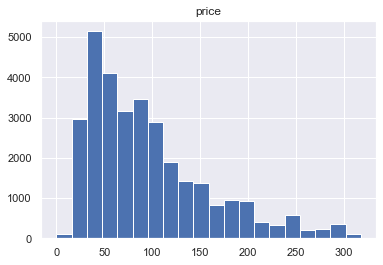

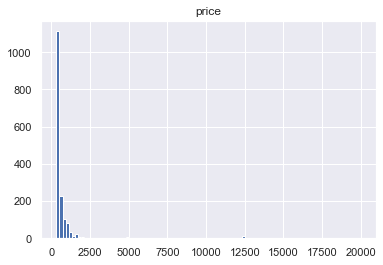

In [19]:
# your code goes here
percentile = df_listings_london.agg(F.percentile_approx('price', [0.95], 1000000).alias('95% quantile')).show()
df_low = df_listings_london.filter(df_listings_london.price <= 318).toPandas().hist('price', bins=20)
df_high = df_listings_london.filter(df_listings_london.price > 318).toPandas().hist('price', bins=100)

## Part 2: Prices by type of property (5 pts)

Compute and visualise the average price and average rating per type of property, for property types with 75 or more listings. 

Your visualisation should be a single bar chart with two y-axes and two bars per property type. The x-axis should be ordered by average rating.

In [20]:
df_price_property = df_listings_london.groupBy('property_type').agg(F.mean('price'), F.mean('review_scores_rating'), F.count('property_type')) \
        .sort(F.desc(F.count('property_type'))).limit(12)

df_price_property.toPandas()

,property_type,avg(price),avg(review_scores_rating),count(property_type)
0,Apartment,125.272881,92.634743,23043
1,House,123.320923,93.445457,6634
2,Townhouse,113.001657,95.200364,1207
3,Serviced apartment,209.711579,89.445570,475
4,Condominium,143.811530,94.624260,451
5,Loft,113.351613,94.856604,310
6,Bed and breakfast,109.358885,91.589641,287
7,Hostel,107.252336,85.842105,107
8,Other,90.254902,90.627451,102
9,Guesthouse,136.606383,92.185714,94


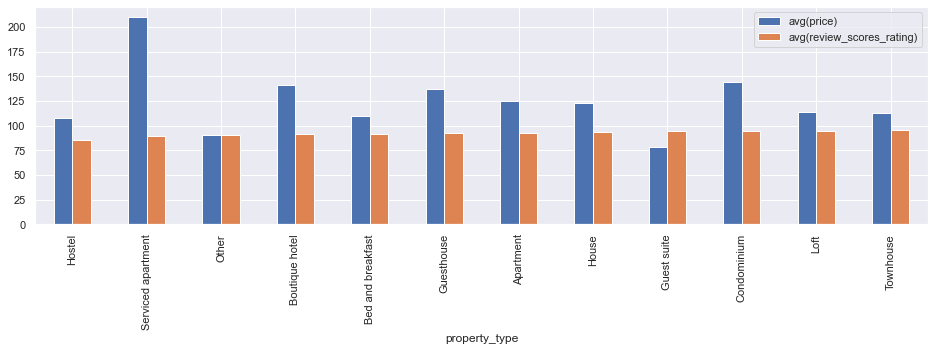

In [21]:
df_price_property = df_price_property.sort(F.asc('avg(review_scores_rating)')).toPandas()
_ = df_price_property.drop(columns = ["count(property_type)"]).set_index('property_type').plot.bar(figsize=(16, 4))

## Part 3: Best offering in the neighbourhood (10 pts)

The value of a listing is its rating divided by its price. Compute and display a dataframe (with the columns you selected in Exercise 1 and those computed in this part) with the 3 highest valued listings in each neighbourhood, and having a value above 5. Make sure to use the `neighbourhood_cleansed` column in your computations.

Computing ranks based on value can be achieved using `pyspark.sql.window.Window`. This may produce equal ranks (i.e. when the value of two listings are the same).

Remember to use `pd.set_option('display.max_rows', <n>)` with appropriate `<n>` so all rows are displayed.

In [22]:
from pyspark.sql import Window
from pyspark.sql.functions import rank, col

In [23]:
# your code goes here
df_listings_london = df_listings_london.withColumn('value', df_listings_london['review_scores_rating']/df_listings_london['price'])
pd.set_option("display.max_rows", 56)
window = Window.partitionBy(df_listings_london['neighbourhood_cleansed']).orderBy(df_listings_london['value'].desc())
df_listings_london.select('*', rank().over(window).alias('rank')).filter(col('rank') <= 3).filter(col('value')>5).toPandas()

,id,neighbourhood_cleansed,city,price,review_scores_rating,property_type,value,rank
0,12458875,Barnet,London,19.0,98,House,5.157895,1
1,16906771,Brent,London,14.0,91,House,6.500000,1
2,5001727,Brent,London,15.0,94,Apartment,6.266667,2
3,12164995,Brent,London,13.0,81,Hostel,6.230769,3
4,20029439,Bromley,London,10.0,100,House,10.000000,1
5,24979813,Camden,London,16.0,90,Hostel,5.625000,1
6,13105708,Camden,London,15.0,80,Apartment,5.333333,2
7,24978338,Camden,London,17.0,90,Hostel,5.294118,3
8,7208317,Croydon,London,18.0,92,House,5.111111,1
9,8420459,Croydon,London,19.0,97,Apartment,5.105263,2


## Part 4: Activity by month (5 pts)

Activity is given by the number of reviews received in a given time period. Compute and visualise the activity based on month, that is, the total number of reviews given in January, February, etc..

Your additional data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/reviews_london.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_reviews_london`.

In [24]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')

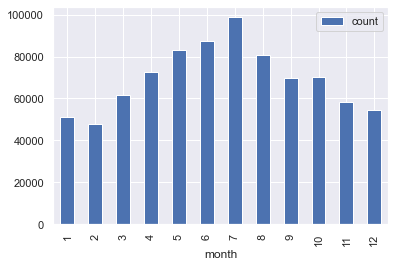

In [25]:
# your code goes here
pd_reviews_london=df_reviews_london.select(F.month("date").alias("month")).groupby("month").count().orderBy("month").toPandas()
pd_reviews_london.set_index("month").plot.bar()

## Part 5: Reviews per listing (5 pts)

Each London listing has received 0 or more reviews. 

Display a dataframe showing 1) The number of listings, 2) The average number of reviews a listing receives, 3) The standard deviation of the reviews per listing distribution, 4) The minimum number of reviews any listing has received, and 5) The maximum number of reviews any listing has received.

In [26]:
# your code goes here
df_temp=df_reviews_london.groupby("listing_id").count()
df_temp.agg(F.count("listing_id"),F.mean("count"),F.stddev("count"),F.min("count"),F.max("count")).toPandas()

,count(listing_id),avg(count),stddev_samp(count),min(count),max(count)
0,25920,32.26821,50.87515,1,690


# Exercise 3: Word sentiment (45 pts)

In this exercise you must use Spark to do the data processing. For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. You may need multiple queries to solve the individual parts.

The goal here is to determine what sentiment (positive or negative) words in reviews have. Roughly speaking, we want each word to be assigned a score based on the rating of the reviews in which the word occurs in the review comment. We'd expect words such as "clean", "comfortable", "superhost" to receive high scores, while words such as "unpleasant", "dirty", "disgusting" would receive low scores.

As individual reviews do not have a rating, we'll consider the rating of individual reviews to be the rating of its related listing (i.e. assuming each review gave the average rating (`review_scores_rating`) of the listing). 

The score of a word is given by the mean review rating over the reviews in which that word occurs in the comment. We require words to appear in at least 0.5% (1 in 200) listings, and to be at least 4 characters, for it to have a defined score.

Formally, when a word $w$ occurs in at least $0.5\%$ of listings and $|w| > 3$, its score is

$
\begin{align*}
score(w) = \frac{1}{|C_w|}\sum_{comment \in C_w} \text{review_rating}(comment)
\end{align*}
$
, where 
* $C_w = \{comment \mid w \text{ occurs in } \text{clean_text}(comment)\}$, the set (so no duplicates) of comments in which $w$ occurs, and
* $\text{clean_text}(comment)$ is the result of your `clean_text` function defined below, and
* $\text{review_rating}(comment)$ is the `review_scores_rating` of the listing which this $comment$ is related to.


## Part 1: Toy data (15 pts)

To get started we'll consider a toy example where the input is `df_sentiment_listings_toy` and `df_sentiment_reviews_toy` defined in the next code cell. You should provide an implementation of `calculate_word_scores_toy` in the subsequent code cell. Your implementation should result in a query that when given the toy example dataframes as input and is materialized with `toPandas()` produces this table:

|    | word   |   word_score |   listing_occurences |   word_occurences |   comment_occurences |
|---:|:-------|-------------:|---------------------:|------------------:|---------------------:|
|  0 | aaaa   |      7       |                    3 |                 5 |                    5 |
|  1 | bbbb   |      6.66667 |                    2 |                 3 |                    3 |
|  2 | eeee   |      0       |                    1 |                 1 |                    1 |
|  3 | dddd   |      5       |                    1 |                 1 |                    1 |
|  4 | cccc   |      5       |                    2 |                 2 |                    2 |'

Observe that `word_occurences` and `comment_occurences` are the same as words occuring multiple times in a comment are counted once, and that `clean_text` is used to ignore casing and discard non-words. Additionally, any word occuring at least once will occur in more than 1 out of 200 listings on this toy data.

In [27]:
from pyspark.sql.types import StructType, StructField, StringType

schema_listings = StructType([
    StructField('id', StringType(), True),
    StructField('review_scores_rating', StringType(), True),
])
data_listings = [
    {'id': '0', 'review_scores_rating': '10'},
    {'id': '1', 'review_scores_rating': '5'},
    {'id': '2', 'review_scores_rating': '0'},
]
df_sentiment_listings_toy = spark.createDataFrame(data_listings, schema_listings)

schema_reviews = StructType([
    StructField('listing_id', StringType(), True),
    StructField('id', StringType(), True),
    StructField('comments', StringType(), True),
])
data_reviews = [
    {'listing_id': '0', 'id': '100', 'comments': 'aaaa bbbb          cccc'},
    {'listing_id': '0', 'id': '101', 'comments': 'aaaa bbbb '},
    {'listing_id': '0', 'id': '102', 'comments': 'aaaa aAAa          aaaa'},
    {'listing_id': '1', 'id': '103', 'comments': 'Aaaa bbb ccc'},
    {'listing_id': '1', 'id': '104', 'comments': 'dddd %ˆ&*'},
    {'listing_id': '2', 'id': '105', 'comments': 'AaaA'},
    {'listing_id': '2', 'id': '106', 'comments': 'bbbb ccc e&eˆˆee'},
    {'listing_id': '2', 'id': '107', 'comments': 'cccc cccc'},
]

df_sentiment_reviews_toy = \
    spark.createDataFrame(data_reviews, schema_reviews) \
        .select(F.col('listing_id'), F.col('id').alias('comment_id'), F.col('comments'))


In [28]:
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer
from pyspark.sql.functions import expr
from pyspark.sql.functions import lower, col, regexp_replace
import re

In [29]:
# your code goes here
def clean_text(col):
    """
        Cleans the text (comment) associated with col. The
        cleaning should:
            1) Lower case the text
            2) Turn multiple whitespaces into single whitespaces
            3) Remove anything but letters, digits and whitespaces
        
        :col: A Spark Column object containing text data
        :returns: A Spark Column object.
    """ 
    
    col = lower(col)                                             #   1) Lower case the text
    col = regexp_replace(col,"\\s+"," ")                         #   2) Turn multiple whitespaces into a single one
    col = regexp_replace(col, "[^a-zA-Z0-9\\s]", "")             #   3) Remove anything but words, numbers, spaces
    return col

    #raise NotImplementedError

In [30]:
from pyspark.sql.functions import arrays_zip, col, explode

In [31]:
def calculate_word_scores_toy(df_list, df_rev):
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The table produced should have the 
        same columns as specified in part 1.
        
        :returns: A pandas DataFrame
    """
    COMMENT_COL="comments"
    LISTING_ID = "listing_id"
    COMMENT_ID = "comment_id"
    df_test=df_rev.withColumn(COMMENT_COL,clean_text(F.col(COMMENT_COL)))
    df_test=df_test.withColumn(COMMENT_COL, F.split("comments", " "))
    df_test=df_test.withColumn(COMMENT_COL, F.expr("filter(comments, x -> not(length(x) < 4))"))
    df_test=df_test.withColumn(COMMENT_COL, explode(COMMENT_COL))
    df_test=df_test.join(df_list,df_test.listing_id==df_list.id)
    

    
    df_temp = df_test.groupBy(COMMENT_COL).agg(F.countDistinct(LISTING_ID).alias('listing_occurences'), F.countDistinct(COMMENT_ID).alias('comment_occurences'))   # 
    
    
    cond=F.col("listing_occurences")>(0.005*df_list.count())
    df_list_occ=df_temp.filter(cond)
    
    df_comment_occ=df_test.select(COMMENT_COL,COMMENT_ID,"review_scores_rating").distinct().groupBy(COMMENT_COL).agg(F.sum("review_scores_rating").alias("temp"))
    
    df_temp=df_temp.join(df_comment_occ.select(COMMENT_COL,"temp"),on=COMMENT_COL)
    
    df_temp = df_temp.withColumn("word_occurences",F.col("comment_occurences"))
    
    df_temp=df_temp.withColumn("word_score",F.col("temp")/F.col("comment_occurences"))
    
    df_temp=df_temp.select(F.col("comments"),F.col("word_score"),F.col("listing_occurences"),F.col("word_occurences"),F.col("comment_occurences")).toPandas()
    
                                   
        
    return df_temp


In [32]:
df = calculate_word_scores_toy(df_sentiment_listings_toy, df_sentiment_reviews_toy)
df

,comments,word_score,listing_occurences,word_occurences,comment_occurences
0,aaaa,7.000000,3,5,5
1,bbbb,6.666667,2,3,3
2,eeee,0.000000,1,1,1
3,dddd,5.000000,1,1,1
4,cccc,5.000000,2,2,2


## Part 2: London comments (15 pts)

In this part we'll calculate word scores for the comments related to London listings only. You should implement `count_relevant_listings` and `calculate_word_scores` (it will be an extension of your function from part 1) below. See the mathematical definition and docstrings for intended behaviour.

The function `calculate_word_scores` should return the top 10 and bottom 10 words by score. You should **not** use caching in your function.

Make sure your satisfy all conditions for a word to be scored (e.g. correctly calculating how many total listings scores are computed over). You should also consider whether your query is optimally structured in terms of computation time. Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all words.

In [33]:
# not using caching
df_listings_analysis.unpersist()

DataFrame[id: string, neighbourhood_cleansed: string, city: string, price: double, review_scores_rating: string, property_type: string]

In [34]:
# your code goes here
def count_relevant_listings(df_list, df_rev):
    """
        Calculates the number of listings in df_list that has a 
        review in df_rev. A listing that is reviewed more than once
        should only count as one.
        
        :returns: An integer 
    """
    num=df_list.join(df_rev,df_list.id==df_rev.listing_id).distinct().count()
    
    return num

In [35]:
pd.set_option('display.max_rows', None)

In [36]:
def calculate_word_scores(df_list, df_rev, listings_count):
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The value of listings_count should 
        be used to filter out words not occuring frequently enough
        in comments. The table produced should have the same columns
        as in part 1 of this exercise.
        
        :returns: A pandas DataFrame containing the top 10 and 
        bottom 10 words based on their word score, sorted by word_score.
    """
    COMMENT_COL="comments"
    LISTING_ID = "listing_id"
    COMMENT_ID = "comment_id"     #was comment_id
    df_rev = df_rev.withColumnRenamed('id', 'comment_id')
    df_test=df_rev.withColumn(COMMENT_COL,clean_text(F.col(COMMENT_COL)))
    df_test=df_test.withColumn(COMMENT_COL, F.split("comments", " "))
    df_test=df_test.withColumn(COMMENT_COL, F.expr("filter(comments, x -> not(length(x) < 4))"))
    df_test=df_test.withColumn(COMMENT_COL, explode(COMMENT_COL))
    df_test=df_test.join(df_list,df_test.listing_id==df_list.id)
    

    
    df_temp = df_test.groupBy(COMMENT_COL).agg(F.countDistinct(LISTING_ID).alias('listing_occurences'), F.countDistinct(COMMENT_ID).alias('comment_occurences'))   # 
    
    
    cond=F.col("listing_occurences")>(0.005*listings_count)
    df_list_occ=df_temp.filter(cond)
    
    df_comment_occ=df_test.select(COMMENT_COL,COMMENT_ID,"review_scores_rating").distinct().groupBy(COMMENT_COL).agg(F.sum("review_scores_rating").alias("temp"))
    
    df_temp=df_list_occ.join(df_comment_occ.select(COMMENT_COL,"temp"),on=COMMENT_COL)   # changed to df_list_occ from  df_temp
    
    df_temp = df_temp.withColumn("word_occurences",F.col("comment_occurences"))
    
    df_temp=df_temp.withColumn("word_score",F.col("temp")/F.col("comment_occurences"))
    
    df_temp=df_temp.select(F.col("comments"),F.col("word_score"),F.col("listing_occurences"),F.col("word_occurences"),F.col("comment_occurences")).sort(F.desc("word_score"))
    
    
    #this does not work
    res2=df_temp.limit(10).toPandas()
    rdd = sc.parallelize(df_temp.tail(10))
    temp=rdd.toDF().toPandas()
    
    res2=res2.append(temp)
    
    
    return res2

In [37]:
# renme the id column
#df_reviews_london = df_reviews_london.withColumnRenamed('id', 'comment_id')

In [38]:
# run the function tht counts the relevant listings
# listings_count = count_relevant_listings(df_listings_london, df_reviews_london)

In [39]:
# should not be modified
from IPython.display import display

relevant_listings_count_london = count_relevant_listings(df_listings_london, df_reviews_london)
word_scores_london_timing = %timeit -o -n1 -r1 display( \
    calculate_word_scores(df_listings_london, \
                          df_reviews_london, \
                          relevant_listings_count_london) \
)

word_scores_london_timing.best

,comments,word_score,listing_occurences,word_occurences,comment_occurences
0,thoughtful,96.280133,4869,9035,9035
1,stylish,96.015141,6327,14200,14200
2,beautiful,95.893828,12445,47442,47442
3,decorated,95.888199,6515,14338,14338
4,home,95.757956,15035,81671,81671
5,tips,95.726929,5887,14000,14000
6,hospitality,95.675658,5782,12308,12308
7,peaceful,95.594112,4777,8118,8118
8,fabulous,95.586948,4587,7447,7447
9,wonderful,95.582088,13068,53083,53083


3min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


210.5532144

## Part 3: Scalability (10 pts)

The listings from London make up a little less than 2% of the entire set of listings. In this part we're interested in how the amount of input data impacts computation time, that is, how `calculate_word_scores` scales as data increases. To this end, we've made multiple samples of the dataset of varying sizes.

The experiment reuses `count_relevant_listings` and `calculate_word_scores` that you implemented in part 2. Code needed for this part is provided to you. 

Your task is to obtain the data sources, run the code cells below, and explain the results you get. Specifically, you must explain any non-linear relationship between data size and computation time, using the markdown cell at the end of this part. In finding explanations, using the Spark UI to investigate the anatomy of your queries may prove valuable. Once you've found an explanation, state a potential solution to remedy the issue. Lastly, include a paragraph stating the specifications of your computer hardware (memory, CPU cores and clock speed, solid state disk or not) on which the experiment has been run.

*Implementation note* Make sure you've properly configured `spark.driver.memory` (it requires a kernel restart to update the value). It may be that your query fails on the larger samples due to running out of compute resources. This is likely caused by a suboptimal `calculate_word_scores`, but can be from reaching the limits of your hardware. If you think the latter is the case, argue for this perspective in the markdown cell.

Your data sources are (uncompress and place in the same directory as this notebook):
* 0.25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-25percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-25percent.csv.zip)
* 0.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-5percent.csv.zip)
* 1%: [listings](https://data-download.compute.dtu.dk/c02807/listings_1-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_1-dot-0percent.csv.zip)
* 2%: [listings](https://data-download.compute.dtu.dk/c02807/listings_2-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_2-dot-0percent.csv.zip)
* 4%: [listings](https://data-download.compute.dtu.dk/c02807/listings_4-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_4-dot-0percent.csv.zip)
* 8%: [listings](https://data-download.compute.dtu.dk/c02807/listings_8-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_8-dot-0percent.csv.zip)
* 12.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_12-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_12-dot-5percent.csv.zip)
* 16%: [listings](https://data-download.compute.dtu.dk/c02807/listings_16-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_16-dot-0percent.csv.zip)
* 25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_25-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_25-dot-0percent.csv.zip)
* 50%: [listings](https://data-download.compute.dtu.dk/c02807/listings_50-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_50-dot-0percent.csv.zip)
* 75%: [listings](https://data-download.compute.dtu.dk/c02807/listings_75-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_75-dot-0percent.csv.zip)
* 100%: [listings](https://data-download.compute.dtu.dk/c02807/listings_100-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_100-dot-0percent.csv.zip)

In [40]:
import time
def calculate_word_scores_timed(percent_str):
    """
        Calculates word scores over a sampled dataset indicated
        by percent_str.
        
        :returns: A dictionary with benchmarking information and
        the calculated values.
    """
    df_listings = load_csv_as_dataframe(f'listings_{percent_str}percent.csv')
    df_reviews = load_csv_as_dataframe(f'reviews_{percent_str}percent.csv')
    
    listings_count = count_relevant_listings(df_listings, df_reviews)

    start = time.time()
    df_word_scores = calculate_word_scores(df_listings, df_reviews, listings_count)
    end = time.time()
    print(percent_str)
    return {
        'percentage': float(percent_str.replace('-dot-', '.')), 
        'time_spent': f"{end - start:.2f}", 
        'relevant_listings': listings_count, 
        'df': df_word_scores
    }

In [41]:
data_percentages = [
    '0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0'
]
score_data = {
    percentage_str: calculate_word_scores_timed(percentage_str) for percentage_str in data_percentages
}

0-dot-25
0-dot-5
1-dot-0
2-dot-0
4-dot-0


In [42]:
#score_data['50-dot-0'] = calculate_word_scores_timed('50-dot-0')

In [43]:
#score_data['75-dot-0'] = calculate_word_scores_timed('75-dot-0')

In [44]:
#score_data['100-dot-0'] = calculate_word_scores_timed('100-dot-0')

In [45]:
df_scores_scaling = pd.DataFrame(score_data).T.convert_dtypes()
df_scores_scaling.time_spent = df_scores_scaling.time_spent.astype(float)

# Access to word scores of 2 percent data: df_scores_scaling.loc['2-dot-0'].df
df_scores_scaling

,percentage,time_spent,relevant_listings,df
0-dot-25,0.25,26.97,77875,comments word_score listing_occure...
0-dot-5,0.50,40.74,153909,comments word_score listing_occure...
1-dot-0,1.00,79.05,324104,comments word_score listing_occure...
2-dot-0,2.00,228.02,646359,comments word_score listing_occure...
4-dot-0,4.00,474.69,1310859,comments word_score listing_occure...


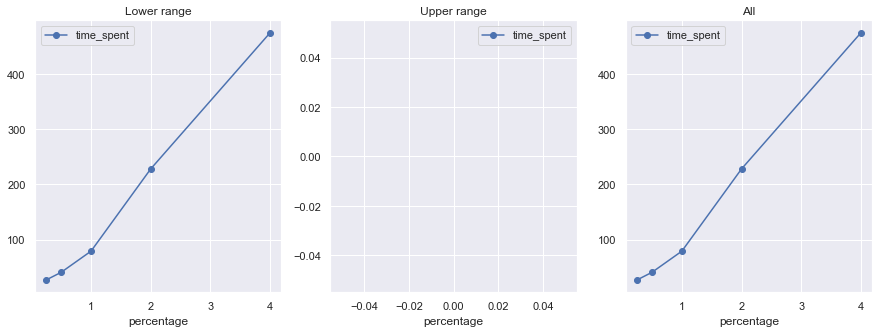

In [46]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

lower_range = ['0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0']
df_scores_scaling[df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[0], style='-o', title='Lower range')
df_scores_scaling[~df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[1], style='-o', title='Upper range')
_ = df_scores_scaling \
    .plot.line(x='percentage', y='time_spent', ax=axes[2], style='-o', title='All')

The plot for the datasets that ran seems to be non-linear but due to technical issues and bad planning then we were unable to compute all data points and as such can't see how the relationship progresses. It would seem likely that the algorithm with the highest order time complexity would dominate as the datasets grew in size.

memory: 16 gb

CPU cores: 4

clock speed: 2.80 GHz

solid state disk: SSD

## Part 4: Robustness (5 pts)

In this part we'll explore robustness of our word scores, using the values we computed in part 3. We'll do so by comparing top/bottom words for three different samples of the dataset. Specifically, the scores from your maximum (e.g. 100%) computed sample are to be compared with the 12.5% and 2.0% scores.

Compute and display a dataframe that accounts for any word found in either of the three samples' top/bottom words, and additionally shows the related `word_score` and `word_occurences` values.

Note that `df_scores_scaling.loc['100-dot-0'].df` provides the word scores dataframe of the 100% sample (similarly for the other two). For this part you should rely on pandas functionality only.  Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all rows.

In [71]:
# your code goes here
df_temp=pd.merge(df_scores_scaling.loc['4-dot-0'].df[["comments","word_score","word_occurences"]],df_scores_scaling.loc['2-dot-0'].df[['comments', 'word_score', 'word_occurences']],on="comments",suffixes=["_4","_2"])
df_temp=pd.merge(df_temp,df_scores_scaling.loc['1-dot-0'].df[["comments","word_score","word_occurences"]],on="comments")
df_temp.rename(columns={"word_score":"word_score_1","word_occurences":"word_occurences_1"})
df_temp

,comments,word_score_4,word_occurences_4,word_score_2,word_occurences_2,word_score,word_occurences
0,thoughtful,97.174175,14916,97.219949,7429,97.219107,3674
1,decorated,96.540822,21643,96.524721,10497,96.543772,5186
2,recommendations,96.466080,19546,96.475505,9512,96.364525,4809
3,stylish,96.460826,24621,96.432125,11941,96.445537,6206
4,ever,96.378262,20269,96.410444,9977,96.416567,5034
5,home,96.363195,96254,96.396670,47329,96.336261,23342
6,hospitality,96.352151,18918,96.397839,9348,96.312028,4631
7,absolutely,96.328173,30944,96.394761,15384,96.272599,7821
8,beautiful,96.312497,96388,96.329515,47321,96.426061,23614
9,price,92.925874,19197,92.795918,9408,92.886672,4712


# Exercise 4: Transactions analysis (55 pts)

In this exercise the goal is to analyse historical business transactions (sales of parts to other companies), and derive insights about both products and customers.

The company X produces and globally sells gadget parts to a number of other companies. You requested the sales department of X to provide you with access to the customer and sales transactions database. To your horror, you've found no such database exists, but the data is instead manually maintained in a spreadsheet (error-prone solution). Intrepid as you are, you've accepted to receive the spreadsheet data as a `.csv`, realizing already data cleaning will be necessary.

Your first step (parts 1 and 2) is to clean the data after which you will derive insights about X's business operations (parts 3 and 4).

The input data is available here: [transactions.csv](http://courses.compute.dtu.dk/02807/2021/projects/project2/transactions.csv)

**Using SQL**

In this final exercise you must write SQL to do the data processing in parts 3 and 4. This entails using `psql.sqldf` to execute your queries (up against `df_transactions_cleaned`) which will return a pandas dataframe. Each question should be answered with a *single* query. For visualisation the `psql.sqldf` call should be followed only by functions necessary to customize the plotting/layout steps or reshape the dataframe (i.e. no data processing take place after your SQL statement is materialized as a pandas dataframe).

In part 1 and 2 of this exercise, you should make use of pandas functionality.



## Part 1: Data cleaning (15 pts)

For each column in the dataframe, investigate and **correct** problematic aspects such as,
* Missing values: Insert meaningful values (data imputation). Detectable as `np.nan`'s. A typical value for imputation is the *mode* (most frequent value) of the distribution. If no proper data imputation is possible, you may resort to dropping rows.
* Incorrect values: Typos and other data mishaps are present as values are manually entered. Detectable as low-prevalence categorical values, or ambigious data links (e.g. company listed in multiple countries). If no proper value correction is possible, you may resort to dropping rows.

In both cases, your strategy for replacing values should be data-driven, that is, shaped by the patterns you observe in the data. It is allowed to skip correcting the data (and instead drop the rows) if few rows are improved by your corrections. If in doubt, do the correction.

After all your cleaning steps are completed, you should run the `PandasProfiler` on your cleaned dataset, which should now contain 0% missing cells. Lastly, summarize the issues you identified and how you addressed them.

### Read, profile and explain

As the first step, load the data naming the dataframe `df_transactions`, and make a copy named `df_transactions_cleaned` on which your data cleaning steps will be done. Establish an overview using `PandasProfiler` (but realize there's more to cleaning than what this tool will let you know). Write a paragraph on what the data is about (e.g. what does a row constitute), and a paragraph on what the profile report tells you.

In [48]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions_cleaned = df_transactions.copy()
df_transactions_cleaned.head(5)

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55


Each row is a transaction, and the columns are information on the part id, the company who bought the part, the country and city where the company is located, the price, and the date and time of sale.

In [49]:
html_obj = ProfileReport(df_transactions)
html_obj

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There are 20568 observations, 6 variables, and 2215 cells are missing.

There are 100 distinct parts ("high cardinality" means there is relatively low repetition for parts).

There are 20552 distinct dates/times, meaning very few sales are made together at the same time.

There are 19214 distinct prices, meaning that prices for the same part are not necessarily the same.

There were 5 prices entered as "-".



There are some cities missing (0.2%)

There are a lot of countries missing (10.6%).

None of the companies are missing, which could be useful for imputation. Especially since company is highly correlated with city and country.

### Country column

In [50]:
df_transactions_cleaned["country"].value_counts().tail(3)

Portuga     5
Tyskland    1
US          1
Name: country, dtype: int64

In [51]:
# There are some low prevalance categories, but they are all identifiable mistakes, so they can be replaced with a dictionary

dic = {"Portuga": "Portugal", "US": "United States", "Tyskland": "Germany"}
df_transactions_cleaned.replace({"country": dic},inplace=True)
df_transactions_cleaned["country"].value_counts().tail(3)

Netherlands    427
Japan          159
Switzerland     11
Name: country, dtype: int64

In [52]:
# The rows with missing countries have the company available, so we can impute the mode country from the company

df_transactions_cleaned["country"] = df_transactions_cleaned.groupby("company").transform(lambda x: x.fillna(x.value_counts().index[0]))["country"]
df_transactions_cleaned["country"].isna().sum()

0

### Company column

In [53]:
df_transactions_cleaned["company"].value_counts().tail(7)

Zooxo.         2
 a             1
Thoughtmixz    1
aa             1
 -             1
Ntagz          1
Laj0           1
Name: company, dtype: int64

In [54]:
# There are a few rows with mislabelled companies - some are easy readable as typos. We can replace them using a dictionary
# Some are unintelligible and these rows are dropped

dic = {"Zooxo.": "Zooxo", "Thoughtmixz": "Thoughtmix", "Laj0": "Lajo", "Ntagz": "Ntags"}
df_transactions_cleaned.replace({"company": dic},inplace=True)

temp = df_transactions_cleaned["company"].value_counts()
index = df_transactions_cleaned["company"].isin(temp[temp>5].index[:].to_list())
df_transactions_cleaned = df_transactions_cleaned[index]

df_transactions_cleaned["company"].value_counts().tail(7)

Riffpath     151
Kanoodle     127
Bubblemix     54
Innojam       44
Gevee         36
Gabtune       27
Tagtune       12
Name: company, dtype: int64

In [55]:
df_transactions_cleaned["country"].isna().sum()

0

### City column

In [56]:
# One city name had extra characters so we removed those. There didn't seem to be other mistakes

df_transactions_cleaned["city"] = df_transactions_cleaned["city"].where(df_transactions_cleaned["city"]!="Amadora\t", other="Amadora")

# The rows with missing city have the company available, so we can impute the mode city from the company

df_transactions_cleaned["city"] = df_transactions_cleaned.groupby("company").transform(lambda x: x.fillna(x.value_counts().index[0]))["city"]
df_transactions_cleaned["city"].isna().sum()

0

### Parts column

In [57]:
# We considered imputing the mode of the city.
# But this didn't seem sensible, since there were so many unique parts for each city. 
# So we decided it was best to drop the rows (there are only 10 missing)

df_transactions_cleaned = df_transactions_cleaned.dropna(subset=["part"])
df_transactions_cleaned["part"].isna().sum()

0

### Price column

In [58]:
# There is 1 missing price, and there are 5 entered as "-", which we also consider as missing.
# For these missing prices, we impute an example of a price of the same part sold in the same city.

df_transactions_cleaned.loc[(df_transactions_cleaned["price"] == "-"), "price"] = np.NaN
df_transactions_cleaned["price"] = df_transactions_cleaned.groupby(['part', 'city']).transform(lambda x: x.fillna(x.value_counts().index[0]))["price"]
df_transactions_cleaned["price"].isna().sum()

0

### Date column

In [59]:
df_transactions_cleaned["date"] = df_transactions_cleaned["date"].str[0:10]

df_transactions_cleaned["date_temp"]=pd.to_datetime(df_transactions_cleaned["date"],format="%Y-%m-%d",errors='coerce')
df_transactions_cleaned["date_temp"].iloc[9328:9335]=pd.to_datetime(df_transactions_cleaned["date"].iloc[9328:9335],format="%d/%m/%Y")

df_transactions_cleaned=df_transactions_cleaned.dropna(subset=["date_temp"])
df_transactions_cleaned["date"]=df_transactions_cleaned["date_temp"]
df_transactions_cleaned=df_transactions_cleaned.drop("date_temp",axis=1)

C:\Users\lfirl\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Profile `df_transactions_cleaned` and summarize corrections made

In [60]:
html_obj = ProfileReport(df_transactions_cleaned)
html_obj



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Country**: 

There were identifiable mistakes that we corrected (Portuga -> Portugal, Tyskland -> Germany, etc.). 

For missing cells we imputed the mode country from the company.

**Company**: 

There were identifiable mistakes that we corrected (Zooxo. -> Zooxo, Thoughtmixz -> Thoughtmix, etc.).

There were unintelligible low-prevalance categories (aa,a,-) whose rows we dropped.

**City**: 

One city had extra characters which we removed (Amadora\t -> Amadora).

For missing cells we imputed the mode country from the company.

**Parts**: 

There were so many unique parts that imputing the mode wasn't sensible. So we dropped the missing rows (10).

**Price**: 

We labelled prices labelled "-" as missing.

Then for each missing price we imputed the mode (effectively an example price, since they were mostly unique) of the same part sold in the same city. It would have been natural to use the mean but the prices weren't standardized until the next section.

**Date**:

We dropped the two transactions that took place on the 32nd of june, since there was no good way to identify the real date.

We changed some dates that had the wrong format (day month year to year month day).

We changed the data type to timestamp.

**Summary**:

We dropped 15 rows in total.

There are no more missing cells.

## Part 2: Standardise prices (5 pts)

Transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into the common currency (chosen here as) EUR, for comparability. These standardised prices should be added as a column to the dataframe called `prices_euro`.

Consider a two step process where you 1) Identify what currency has been used, and 2) Calculate the price conversion. Step 1 may reveal the data is still not completely clean (so either correct by impute or drop). For Step 2 look up exchange rates on the Internet.

In [61]:
temp = np.zeros((len(df_transactions_cleaned["price"])))
temp[df_transactions_cleaned["price"].str[-1]=="€"]=df_transactions_cleaned["price"][df_transactions_cleaned["price"].str[-1]=="€"].replace(to_replace="\D$|^\D| ",value="",regex=True).astype("float")
temp[df_transactions_cleaned["price"].str[0]=="$"]=df_transactions_cleaned["price"][df_transactions_cleaned["price"].str[0]=="$"].replace(to_replace="\D$|^\D| ",value="",regex=True).astype("float")*0.89
temp[df_transactions_cleaned["price"].str[0]=="£"]=df_transactions_cleaned["price"][df_transactions_cleaned["price"].str[0]=="£"].replace(to_replace="\D$|^\D| ",value="",regex=True).astype("float")*1.19
temp[df_transactions_cleaned["price"].str[0]=="¥"]=df_transactions_cleaned["price"][df_transactions_cleaned["price"].str[0]=="¥"].replace(to_replace="\D$|^\D| ",value="",regex=True).astype("float")*0.0077
df_transactions_cleaned["prices_euro"] = temp

In [62]:
df_transactions_cleaned["prices_euro"].isna().sum()

0

## Part 3: Business insights (15 pts)

### Company by revenue

The revenue of a company is its total value of orders, all time. Compute and visualise all companies by revenue in descending order.

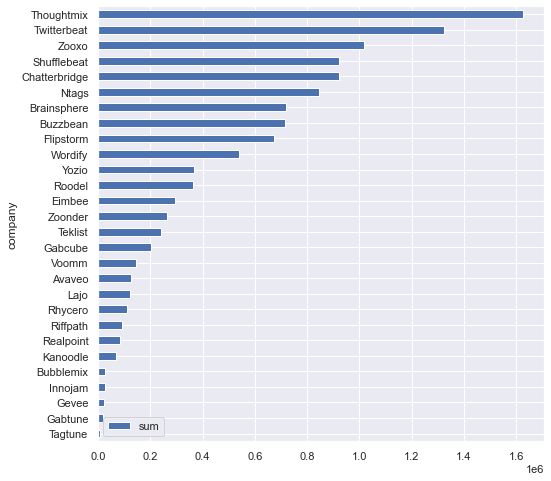

In [63]:
psql.sqldf("""
    SELECT company, 
    SUM(prices_euro) 
    as sum FROM df_transactions_cleaned 
    GROUP BY company
""").set_index("company").sort_values(by="sum",ascending=True).plot.barh(figsize=(8,8))

### Country by revenue, per year

The revenue of a country in a time period, is its total value of orders in that time period. Compute and visualise all countries by revenue, for years 2016, 2017 and 2018. Your visualisation should have countries on the x-axis and multiple bars (one for each year).

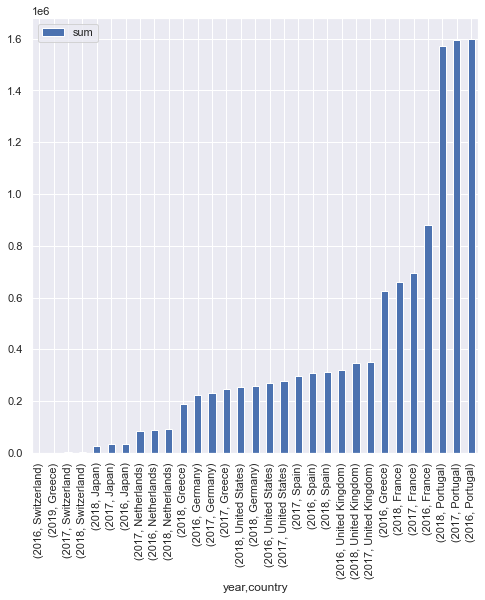

In [64]:
psql.sqldf("""
SELECT country, 
SUM(prices_euro) as sum, 
STRFTIME("%Y",date) as year 
FROM df_transactions_cleaned 
GROUP BY country,year""").set_index(["year","country"]).sort_values(by="sum",ascending=True).plot.bar(figsize=(8,8))


### Orders per quarter, all companies

Compute and visualise the number of orders each company has placed in each quarter. Exclude quarters where the order count is less than 3. As always, be mindful to not produce a cluttered visualisation.

Part of your query should form a variable that converts `date` into `YEAR_QUARTER` format. Dealing with dates is via `STRFTIME` [docs](https://www.sqlite.org/lang_datefunc.html) which doesn't allow quarter extraction. Instead, it allows for extraction of month, which you can case on in order to produce the quarter (Q1, Q2, Q3, Q4).  

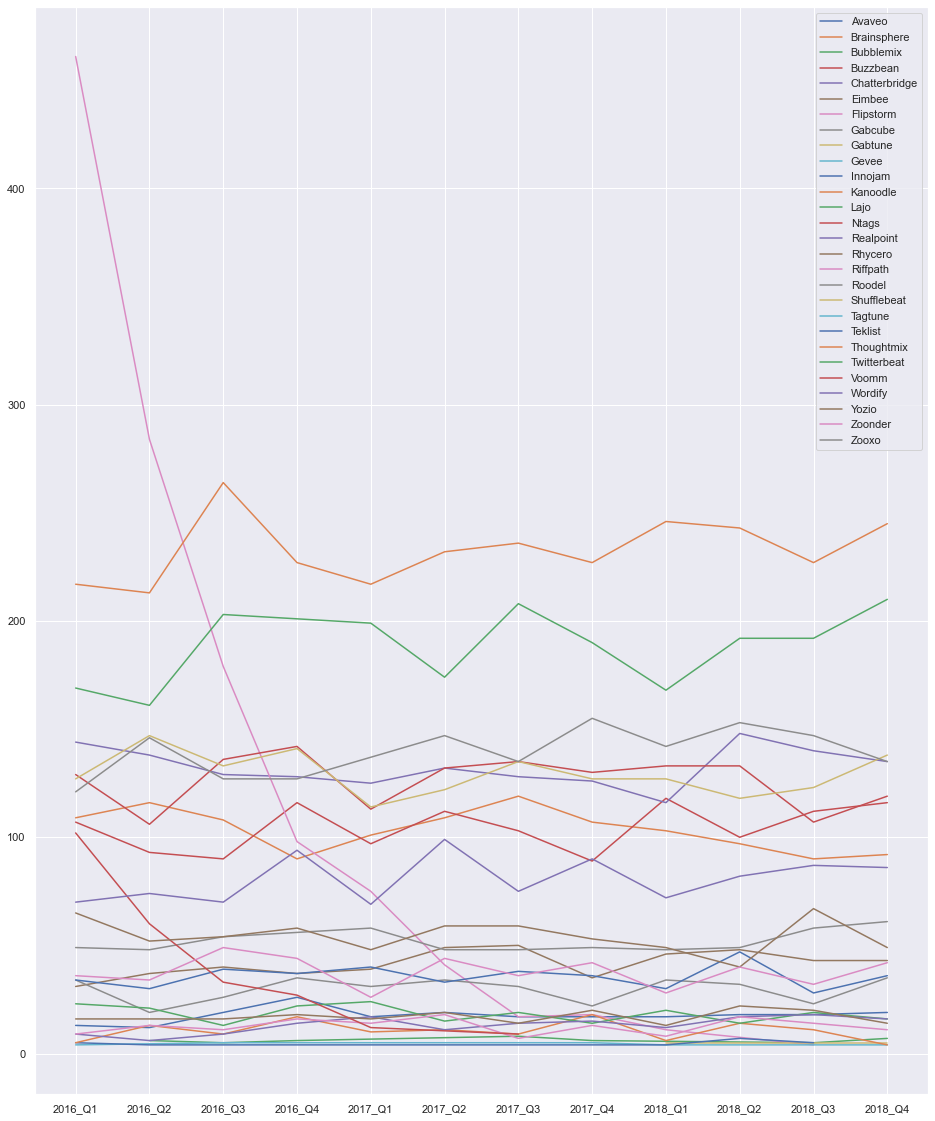

In [65]:
# your code goes here

temp=psql.sqldf("""
    SELECT company,COUNT(*) AS count,
           CASE
               WHEN STRFTIME('%m', date) > '09' THEN STRFTIME('%Y', date)||"_"||"Q4"
               
               WHEN STRFTIME('%m', date) > '06' THEN STRFTIME('%Y', date)||"_"||"Q3"
               
               WHEN STRFTIME('%m', date) > '03' THEN STRFTIME('%Y', date)||"_"||"Q2"
               
               ELSE STRFTIME('%Y', date)||"_"||"Q1"
               
            END quarter
      FROM df_transactions_cleaned
      
      GROUP BY company,quarter
      
      HAVING count>3
""")

fig, ax = plt.subplots(figsize=(16,20))
for label, df in temp.groupby('company'):
    ax.plot(df['quarter'], df['count'], label=label)


_ = ax.legend()

## Part 4: Parts and prices (20 pts)

### Parts demand changes

A different amount of orders are placed on parts each year. The demand of a part is the number of orders placed on it. The demand change of a part is the absolute difference between its average demand in 2016/2017, and its demand in 2018.

Compute and visualise the 15 parts whose demand change has been the largest.

In [66]:
psql.sqldf("""
   SELECT part,date,STRFTIME('%Y', date) as year,
   CASE
       WHEN STRFTIME('%Y', date)>'2017' THEN 1
       ELSE 0
       
       end count
   FROM df_transactions_cleaned
   GROUP BY part,year
""")

,part,date,year,count
0,0185-0373,2016-01-15 00:00:00.000000,2016,0
1,0185-0373,2017-01-18 00:00:00.000000,2017,0
2,0185-0373,2018-01-02 00:00:00.000000,2018,1
3,0228-2167,2016-01-06 00:00:00.000000,2016,0
4,0228-2167,2017-01-04 00:00:00.000000,2017,0
5,0228-2167,2018-01-18 00:00:00.000000,2018,1
6,0268-1128,2016-01-08 00:00:00.000000,2016,0
7,0268-1128,2017-01-01 00:00:00.000000,2017,0
8,0268-1128,2018-01-06 00:00:00.000000,2018,1
9,0268-1401,2016-01-12 00:00:00.000000,2016,0


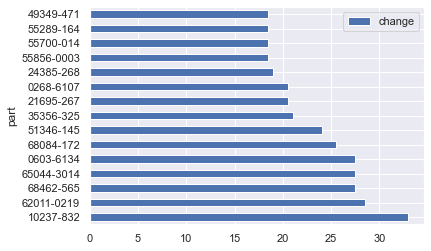

In [67]:
# your code goes here
psql.sqldf("""
   WITH temp AS (
   SELECT part,date,STRFTIME('%Y', date) as year,
   CASE
       WHEN STRFTIME('%Y', date)>'2017' THEN COUNT(*)
       ELSE -COUNT(*)*0.5
       
       end count
   FROM df_transactions_cleaned
   GROUP BY part,year
    )
   SELECT part, ABS(SUM(count)) AS change FROM temp
   GROUP BY part
   ORDER BY change DESC
   LIMIT 15
""").set_index("part").plot.barh()


### Popular parts pricing

The most popular parts are those whose demand has increased the most from its 2016/2017 average to 2018. We're interested to find out if popularity is due to a price drop, and also inform us if prices of these parts are properly adjusted.

The demand increase of a part is its 2018 demand minus its 2016/2017 average demand. The price change of a part is its average 2018 price minus its average 2016/2017 price.

Compute the parts whose demand has increased (has positive demand increase) and the change in price for each of these parts. Then visualise this relationship and include in the figure title the correlation (compute via pandas) between these two variables. Conclude which is most likely 1) Parts became more popular from a drop in prices, or 2) The sales department deserved its bonuses.

Text(0, 0.5, 'price change')

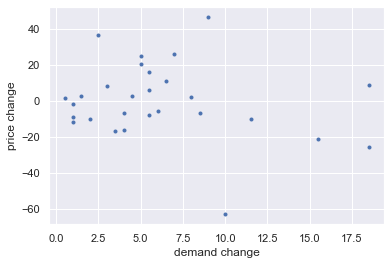

In [68]:
# your code goes here
temp=psql.sqldf("""
   WITH temp AS (
   SELECT part,prices_euro,date,STRFTIME("%Y",date) as year,AVG(prices_euro) AS avg,
   CASE
       WHEN STRFTIME("%Y",date)>'2017' THEN COUNT(*)
       ELSE -COUNT(*)*0.5
       
       end count,
   CASE
       WHEN STRFTIME("%Y",date)>'2017' THEN 1
       ELSE 0
       
       end thing
   FROM df_transactions_cleaned
   GROUP BY part,thing
    ),
   temp2 AS (SELECT part,thing,avg,count,
   CASE
       WHEN thing==1 THEN avg
       ELSE -avg
       end vals
   FROM temp) SELECT part,SUM(count) AS demand_change, SUM(vals) AS price_change FROM temp2
   GROUP BY part
   HAVING demand_change>0
   ORDER BY price_change DESC
""")

   
temp.corr()


plt.plot(temp["demand_change"],temp["price_change"],".")
plt.xlabel('demand change')
plt.ylabel('price change')

In [69]:
temp.corr()

,demand_change,price_change
demand_change,1.000000,-0.196001
price_change,-0.196001,1.000000


The two variables are not highly correlated, and there were many demand increases for parts whose prices increased.

It is more likely that the sales department deserved the bonuses.